In [5]:
import requests
import json
import pandas as pd
import csv
import matplotlib.pyplot as plt
from tkinter import *
key= "82a06b1b6e843caf8a6442ea3d2e5f1b2db849a9"

Please Enter a State Code01
Please Enter a State Code02


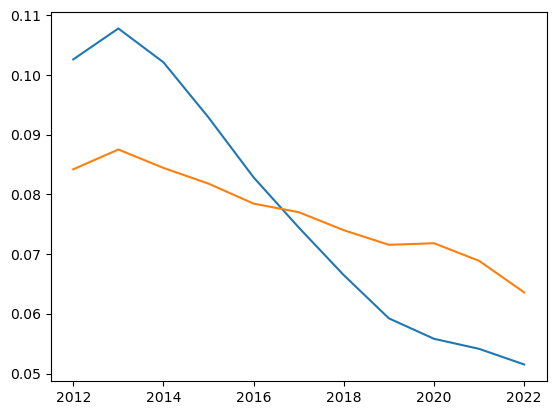

In [4]:

def unemployment_rates():
    unemployment_rates1=[]
    unemployment_rates2=[]
    years=[]
    year=2012
    state1=input("Please Enter a State Code")
    state2=input("Please Enter a State Code")
    while year <=2022:
        state1_json=requests.get(f"https://api.census.gov/data/{year}/acs/acs5?get=NAME,B23025_005E,B23025_003E&for=state:{state1}&key={key}").json()
        state2_json=requests.get(f"https://api.census.gov/data/{year}/acs/acs5?get=NAME,B23025_005E,B23025_003E&for=state:{state2}&key={key}").json()
        unemployment_rate1=int(state1_json[1][1])/int(state1_json[1][2])
        unemployment_rates1.append(unemployment_rate1)
        unemployment_rate2=int(state2_json[1][1])/int(state2_json[1][2])
        unemployment_rates2.append(unemployment_rate2)
        state1_name=state1_json[1][0]
        state2_name=state2_json[1][0]
        years.append(year)
        year+=1
    csv_file=open("unemployment.csv", "w", newline="", encoding="utf-8")
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Year", state1_name, state2_name])
    for year, empr1, empr2 in zip(years, unemployment_rates1, unemployment_rates2):
        csv_writer.writerow([year,empr1,empr2])
    csv_file.close()
    data=pd.read_csv("unemployment.csv")
    plt.plot(data["Year"], data[state1_name], label=state1_name)
    plt.plot(data["Year"], data[state2_name], label=state2_name)
    plt.show()
unemployment_rates()
 #unemployment_rates()


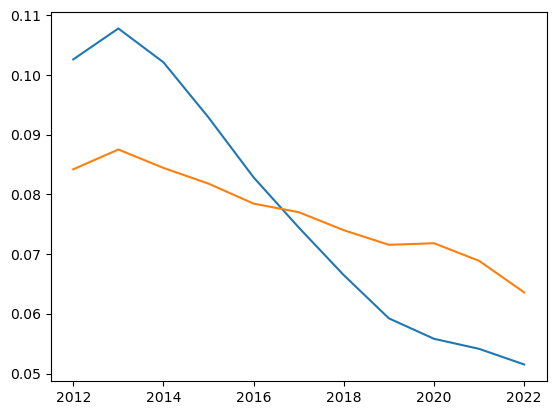

In [13]:
def lineplot():
    data=pd.read_csv("unemployment.csv")
    plt.plot(data["Year"], data["Alabama"], label="Alabama")
    plt.plot(data["Year"], data["Alaska"], label="Alaska")
    plt.show()
lineplot()